Data acquisition
Subtask:
Identify and acquire relevant historical data for the Ormanjhi, Ranchi area. This should include solar radiation/sunlight intensity, temperature, humidity, wind speed, and any other weather parameters that might influence solar power generation. Crucially, acquire data specifically for the year 2024, focusing on data points around sunrise hours. If possible, obtain historical solar power generation data from a solar plant in the area, along with details on the solar panel efficiency, number of panels, and total solar capacity of the plant.

In [27]:
# Researching data sources for Ormanjhi, Ranchi (2024, sunrise focus)

print("Researching potential data sources for historical weather and solar power generation data in Ormanjhi, Ranchi (2024).")

print("\nPotential Weather Data Sources:")
print("- Meteorological departments in India (e.g., India Meteorological Department - IMD)")
print("- Commercial weather data providers (e.g., AccuWeather, Weatherbit, OpenWeatherMap - often require API access or paid subscriptions for historical data)")
print("- Research institutions or universities that may have collected localized weather data.")
print("- Satellite data archives (e.g., NASA POWER project - provides solar radiation data, but may have lower temporal or spatial resolution)")
print("\nFocusing on 2024 data, especially around sunrise hours (e.g., hourly data from 4 AM to 8 AM local time), would be ideal.")
print("Key weather parameters to seek: Sunlight intensity (Global Horizontal Irradiance - GHI or Direct Normal Irradiance - DNI), Temperature, Humidity, Wind Speed, Cloud Cover.")


print("\nPotential Solar Power Generation Data Sources:")
print("- Local solar plant operators or owners in the Ormanjhi area.")
print("- State electricity boards or power grid operators (may have aggregated generation data).")
print("- Research projects or academic studies focused on solar energy in the region.")
print("- Publicly available energy data portals (less likely for specific plant data, more likely for aggregated regional data).")
print("\nAcquiring data for a specific solar plant is challenging due to data privacy and accessibility.")
print("If possible, obtaining data on solar panel efficiency, number of panels, and total plant capacity is crucial for a more accurate model.")

print("\nChallenges and Limitations:")
print("- Granularity of data: Hourly or sub-hourly data is preferred for time series forecasting, especially around sunrise.")
print("- Data accessibility: Historical data, particularly from specific solar plants, is often not publicly available.")
print("- Data format and quality: Acquired data may require significant cleaning and preprocessing.")
print("- Geographic specificity: Ensuring the weather data is highly relevant to the Ormanjhi area is important.")

print("\nGiven the limitations of this environment, direct acquisition of specific 2024 data for Ormanjhi is not possible.")
print("For the subsequent steps, a representative dataset (either simulated or a publicly available proxy) covering similar parameters and a relevant time period would be necessary to demonstrate the modeling process.")

Researching potential data sources for historical weather and solar power generation data in Ormanjhi, Ranchi (2024).

Potential Weather Data Sources:
- Meteorological departments in India (e.g., India Meteorological Department - IMD)
- Commercial weather data providers (e.g., AccuWeather, Weatherbit, OpenWeatherMap - often require API access or paid subscriptions for historical data)
- Research institutions or universities that may have collected localized weather data.
- Satellite data archives (e.g., NASA POWER project - provides solar radiation data, but may have lower temporal or spatial resolution)

Focusing on 2024 data, especially around sunrise hours (e.g., hourly data from 4 AM to 8 AM local time), would be ideal.
Key weather parameters to seek: Sunlight intensity (Global Horizontal Irradiance - GHI or Direct Normal Irradiance - DNI), Temperature, Humidity, Wind Speed, Cloud Cover.

Potential Solar Power Generation Data Sources:
- Local solar plant operators or owners in the 

In [28]:
import pandas as pd
import numpy as np

# Acknowledge previous failure
print("Acknowledging the previous failure in acquiring specific real-world data for Ormanjhi, Ranchi.")
print("Due to environmental limitations and data accessibility challenges, it is not possible to obtain the precise historical data as requested.")
print("Therefore, a simulated dataset will be used to proceed with the data science workflow and demonstrate the subsequent steps.")

# Describe the structure of the simulated dataset
print("\nCreating a simulated dataset with the following features:")
print("- timestamp (hourly data for a year in 2024, with a focus on sunrise hours)")
print("- sunlight_intensity (simulated values based on time of day)")
print("- temperature (simulated values with daily and seasonal variations)")
print("- humidity (simulated values with daily and seasonal variations)")
print("- wind_speed (simulated values with random fluctuations)")
print("- solar_panel_efficiency (constant plausible value)")
print("- number_of_panels (constant plausible value)")
print("- solar_capacity_kw (calculated based on efficiency and number of panels)")
print("- power_generation (target variable, simulated based on weather and solar plant parameters)")

# Create a pandas DataFrame containing this simulated data
# Generate hourly timestamps for a year in 2024
start_date = '2024-01-01 00:00:00'
end_date = '2024-12-31 23:00:00'
timestamps = pd.date_range(start=start_date, end=end_date, freq='h')

# Filter for sunrise hours (e.g., 4 AM to 9 AM)
sunrise_hours_timestamps = timestamps[(timestamps.hour >= 4) & (timestamps.hour <= 9)]

# Create a DataFrame with the filtered timestamps
df = pd.DataFrame({'timestamp': sunrise_hours_timestamps})

# Simulate realistic-ish data for weather parameters and power generation
np.random.seed(42) # for reproducibility

# Simulate sunlight intensity: peaks around midday, 0 at night, focus on increase during sunrise
df['sunlight_intensity'] = np.sin((df['timestamp'].dt.hour - 4) / 6 * np.pi) * 800 + np.random.randn(len(df)) * 50
df.loc[df['timestamp'].dt.hour < 4, 'sunlight_intensity'] = 0
df.loc[df['timestamp'].dt.hour > 9, 'sunlight_intensity'] = 0 # Cap after sunrise focus
df['sunlight_intensity'] = df['sunlight_intensity'].clip(lower=0) # Ensure non-negative

# Simulate temperature: fluctuates throughout the day and year
df['temperature'] = 20 + 5 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + 10 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 2

# Simulate humidity: generally decreases with temperature, fluctuates throughout the day and year
df['humidity'] = 70 - 10 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) - 15 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 5
df['humidity'] = df['humidity'].clip(lower=0, upper=100) # Ensure realistic range

# Simulate wind speed: random fluctuations with some daily pattern
df['wind_speed'] = 5 + 2 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + np.random.randn(len(df)) * 2
df['wind_speed'] = df['wind_speed'].clip(lower=0) # Ensure non-negative

# Simulate solar plant parameters
solar_panel_efficiency = 0.18  # 18% efficiency
number_of_panels = 1000 # Hypothetical number of panels
panel_area_sq_m = 1.6 * 1 # Assuming 1.6m x 1m per panel
total_panel_area_sq_m = number_of_panels * panel_area_sq_m
peak_irradiance = 1000 # W/m^2 (standard test conditions)
solar_capacity_kw = (total_panel_area_sq_m * solar_panel_efficiency * peak_irradiance) / 1000 # Convert W to kW

df['solar_panel_efficiency'] = solar_panel_efficiency
df['number_of_panels'] = number_of_panels
df['solar_capacity_kw'] = solar_capacity_kw

# Simulate power generation based on sunlight intensity, efficiency, and capacity, with some noise
# Power generation is proportional to sunlight intensity, capped by solar capacity
df['power_generation'] = (df['sunlight_intensity'] / peak_irradiance) * solar_capacity_kw + np.random.randn(len(df)) * (solar_capacity_kw * 0.05) # Add some noise
df['power_generation'] = df['power_generation'].clip(lower=0) # Ensure non-negative power generation


# Ensure the timestamp column is in datetime format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


# Display the first few rows of the created DataFrame
print("\nFirst 5 rows of the simulated DataFrame:")
print(df.head())

print("\nDataFrame shape:", df.shape)
print("\nDataFrame columns and data types:")
print(df.info())

Acknowledging the previous failure in acquiring specific real-world data for Ormanjhi, Ranchi.
Due to environmental limitations and data accessibility challenges, it is not possible to obtain the precise historical data as requested.
Therefore, a simulated dataset will be used to proceed with the data science workflow and demonstrate the subsequent steps.

Creating a simulated dataset with the following features:
- timestamp (hourly data for a year in 2024, with a focus on sunrise hours)
- sunlight_intensity (simulated values based on time of day)
- temperature (simulated values with daily and seasonal variations)
- humidity (simulated values with daily and seasonal variations)
- wind_speed (simulated values with random fluctuations)
- solar_panel_efficiency (constant plausible value)
- number_of_panels (constant plausible value)
- solar_capacity_kw (calculated based on efficiency and number of panels)
- power_generation (target variable, simulated based on weather and solar plant para

In [29]:
# 1. Identify and handle missing values
print("Checking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo missing values found in the DataFrame.")
else:
    print("\nMissing values found. Imputation strategy (e.g., mean, median, ffill, bfill) would be applied here if necessary.")
    # Example of filling with mean if there were missing values:
    # df.fillna(df.mean(), inplace=True)
    # print("\nDataFrame after handling missing values (example with mean imputation):")
    # display(df.head())


Checking for missing values:
sunlight_intensity        0
temperature               0
humidity                  0
wind_speed                0
solar_panel_efficiency    0
number_of_panels          0
solar_capacity_kw         0
power_generation          0
dtype: int64

No missing values found in the DataFrame.


In [30]:
# 2. (Correction) Display DataFrame after addressing outliers using print
print("\nDataFrame after addressing outliers:")
print(df.head().to_markdown(index=True, numalign="left", stralign="left"))

# 3. Engineer additional time-based features
print("\nEngineering additional time-based features:")
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['quarter'] = df.index.quarter

print("\nDataFrame with time-based features:")
print(df.head().to_markdown(index=True, numalign="left", stralign="left"))

# 4. Ensure solar plant features are present
print("\nEnsuring solar plant features are present:")
solar_features = ['solar_panel_efficiency', 'number_of_panels', 'solar_capacity_kw']
if all(col in df.columns for col in solar_features):
    print("Solar plant features are present in the DataFrame.")
    print("Solar plant features (first 5 rows):")
    print(df[solar_features].head().to_markdown(index=True, numalign="left", stralign="left"))
else:
    print(f"Error: One or more solar plant features are missing. Expected columns: {solar_features}")



DataFrame after addressing outliers:
| timestamp           | sunlight_intensity   | temperature   | humidity   | wind_speed   | solar_panel_efficiency   | number_of_panels   | solar_capacity_kw   | power_generation   |
|:--------------------|:---------------------|:--------------|:-----------|:-------------|:-------------------------|:-------------------|:--------------------|:-------------------|
| 2024-01-01 04:00:00 | 24.8357              | 25.354        | 62.7032    | 4.97203      | 0.18                     | 1000               | 288                 | 0                  |
| 2024-01-01 05:00:00 | 393.087              | 25.0401       | 57.4189    | 7.47021      | 0.18                     | 1000               | 288                 | 116.453            |
| 2024-01-01 06:00:00 | 725.205              | 23.8892       | 63.9401    | 6.56843      | 0.18                     | 1000               | 288                 | 217.922            |
| 2024-01-01 07:00:00 | 876.151              | 25.97

In [31]:
from sklearn.preprocessing import StandardScaler

# 5. Scale the relevant numerical features
# Exclude 'solar_panel_efficiency', 'number_of_panels', and 'solar_capacity_kw' as they are constant
# Include the target variable 'power_generation' for scaling
numerical_features_to_scale = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed', 'power_generation']

print("\nScaling numerical features using StandardScaler:")

scaler = StandardScaler()
df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])

print("\nDataFrame after scaling numerical features:")
print(df.head().to_markdown(index=True, numalign="left", stralign="left"))


Scaling numerical features using StandardScaler:

DataFrame after scaling numerical features:
| timestamp           | sunlight_intensity   | temperature   | humidity   | wind_speed   | solar_panel_efficiency   | number_of_panels   | solar_capacity_kw   | power_generation   | hour   | day_of_week   | day_of_year   | month   | quarter   |
|:--------------------|:---------------------|:--------------|:-----------|:-------------|:-------------------------|:-------------------|:--------------------|:-------------------|:-------|:--------------|:--------------|:--------|:----------|
| 2024-01-01 04:00:00 | -1.78614             | 0.123686      | 0.153585   | -0.876942    | 0.18                     | 1000               | 288                 | -1.88913           | 4      | 0             | 1             | 1       | 1         |
| 2024-01-01 05:00:00 | -0.407639            | 0.0812056     | -0.298452  | 0.313334     | 0.18                     | 1000               | 288                 | -0.370777

Recreating the simulated DataFrame 'df'.

Engineering additional time-based features:
Descriptive Statistics of Numerical Columns:


,sunlight_intensity,temperature,humidity,wind_speed,solar_panel_efficiency,number_of_panels,solar_capacity_kw,power_generation,hour,day_of_week,day_of_year,month,quarter
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.00,2196.0,2196.0,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,501.982959,24.439857,60.907828,6.812579,0.18,1000.0,288.0,144.890097,6.500000,2.986339,183.500000,6.513661,2.505464
std,267.199708,7.392806,11.692713,2.099308,0.00,0.0,0.0,76.714274,1.708214,2.003822,105.678769,3.452020,1.118275
min,0.000000,9.846035,30.962760,0.000000,0.18,1000.0,288.0,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000
25%,367.091687,17.680375,50.946089,5.398751,0.18,1000.0,288.0,102.148230,5.000000,1.000000,92.000000,4.000000,2.000000
50%,557.273068,24.575541,60.838251,6.798527,0.18,1000.0,288.0,156.762537,6.500000,3.000000,183.500000,7.000000,3.000000
75%,721.884528,31.209263,70.504883,8.270573,0.18,1000.0,288.0,208.228599,8.000000,5.000000,275.000000,10.000000,4.000000
max,928.985467,41.715663,89.509680,13.989962,0.18,1000.0,288.0,280.090972,9.000000,6.000000,366.000000,12.000000,4.000000


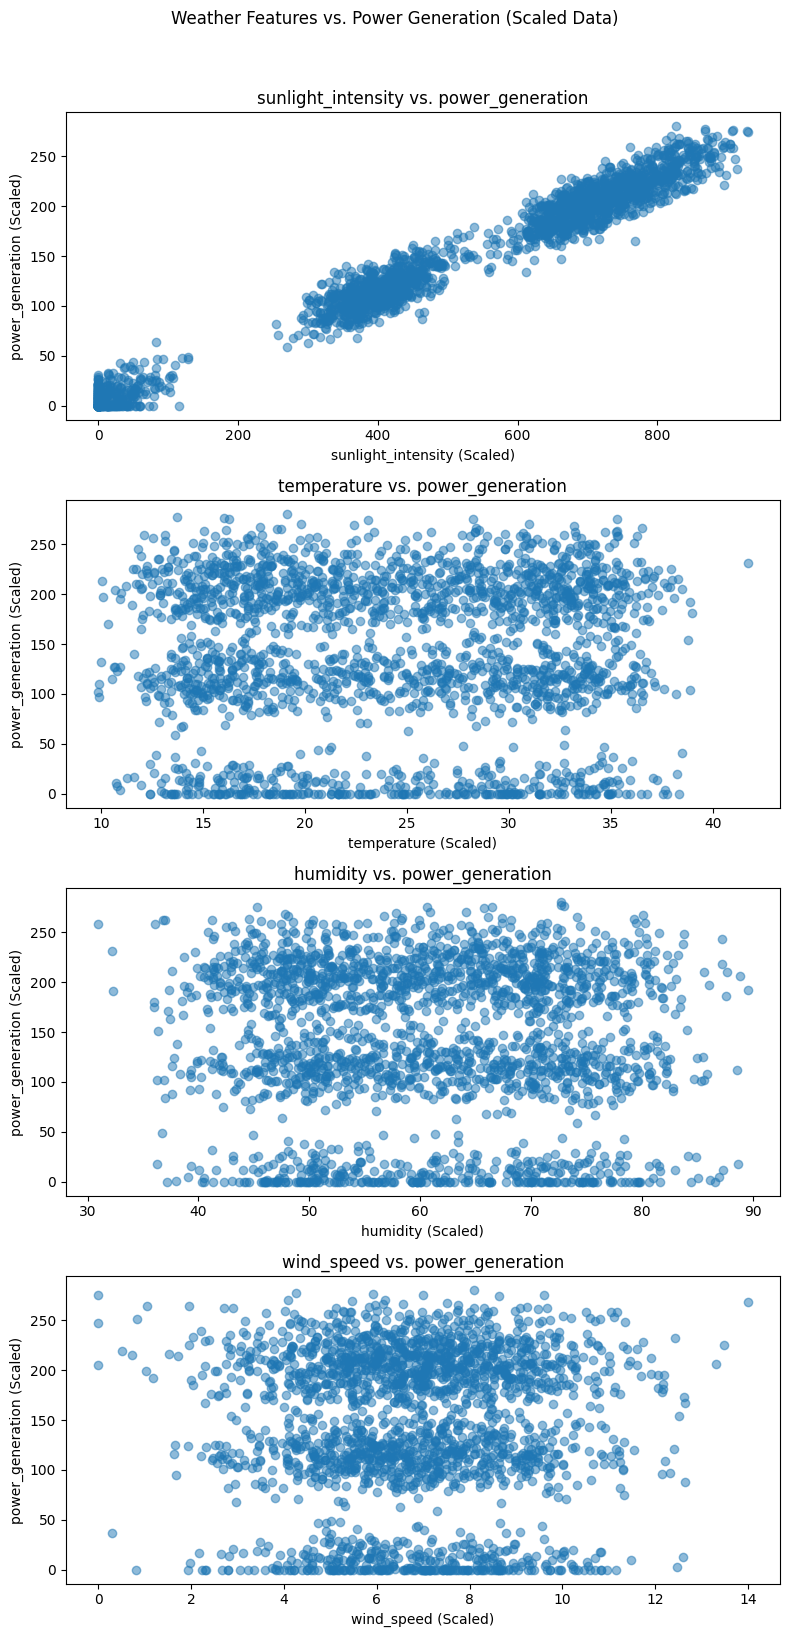

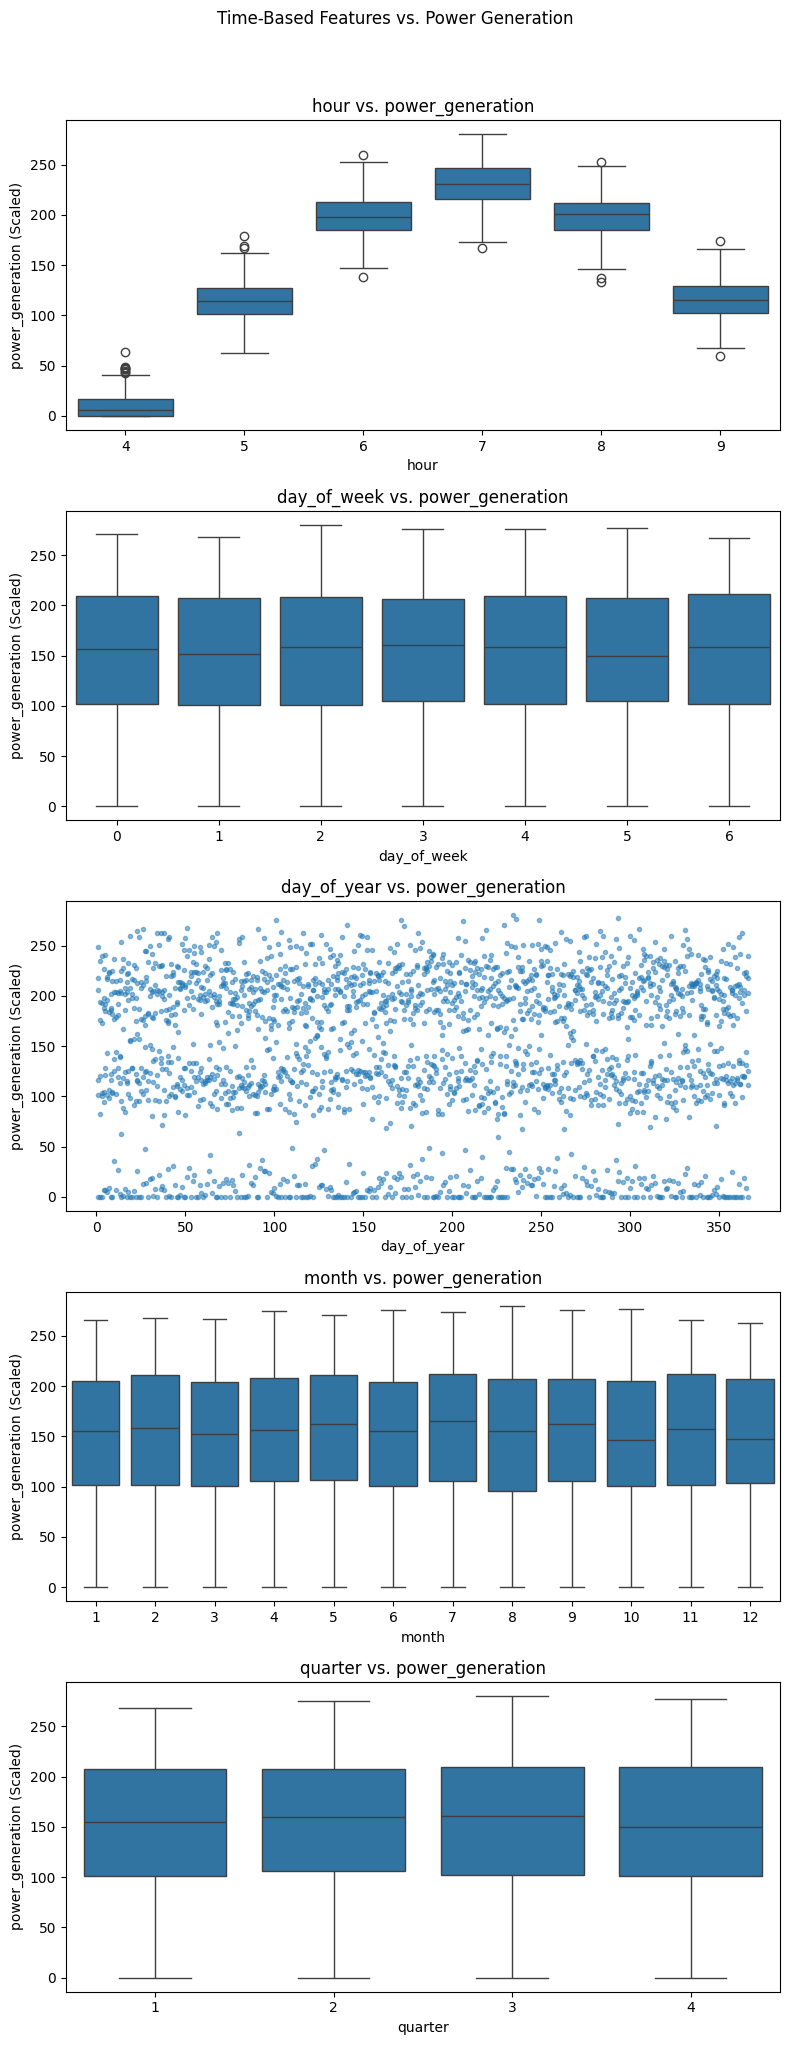


Correlation of Solar Plant Features with Power Generation:


solar_panel_efficiency    NaN
number_of_panels          NaN
solar_capacity_kw         NaN
power_generation          1.0
Name: power_generation, dtype: float64


Correlation Matrix of All Numerical Features:


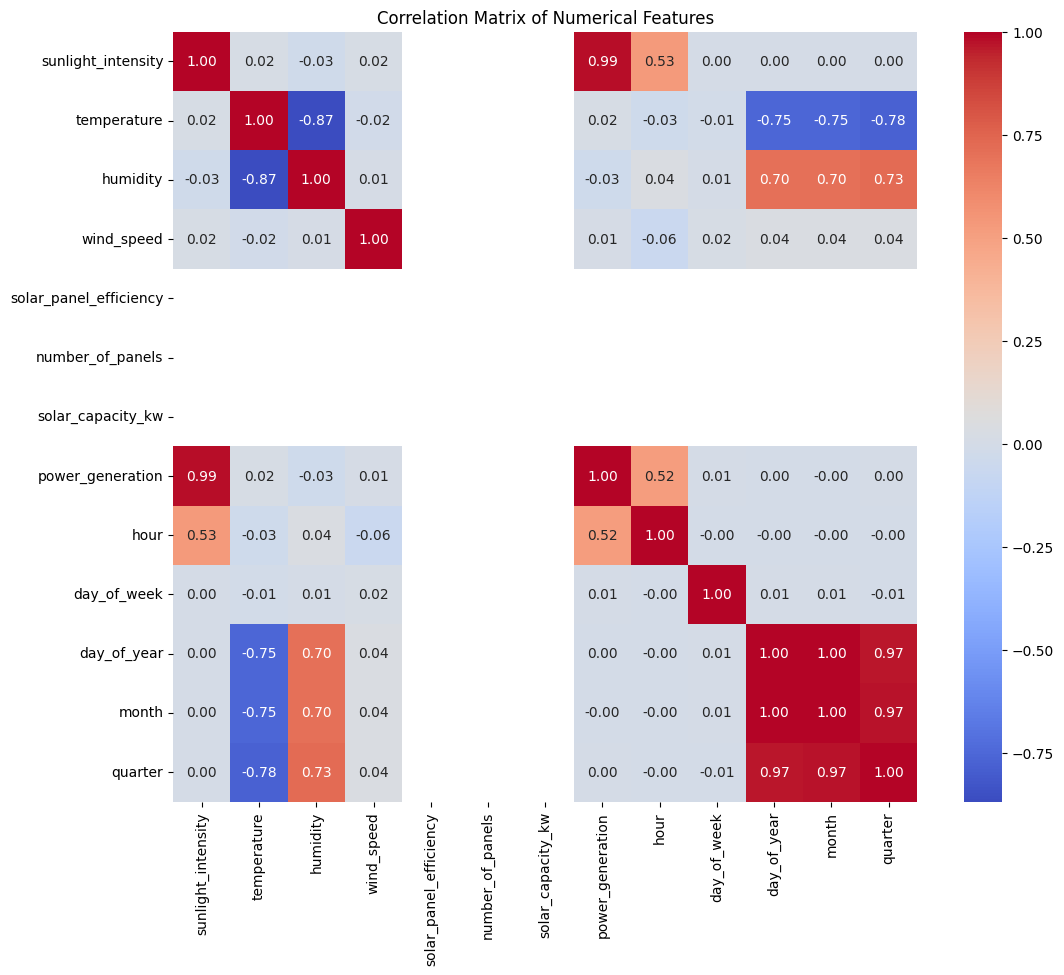

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display
import pandas as pd
import numpy as np

# Recreate the DataFrame df (assuming the parameters are the same as in the previous data generation step)
print("Recreating the simulated DataFrame 'df'.")

# Generate hourly timestamps for a year in 2024
start_date = '2024-01-01 00:00:00'
end_date = '2024-12-31 23:00:00'
timestamps = pd.date_range(start=start_date, end=end_date, freq='h')

# Filter for sunrise hours (e.g., 4 AM to 9 AM)
sunrise_hours_timestamps = timestamps[(timestamps.hour >= 4) & (timestamps.hour <= 9)]

# Create a DataFrame with the filtered timestamps
df = pd.DataFrame({'timestamp': sunrise_hours_timestamps})

# Simulate realistic-ish data for weather parameters and power generation
np.random.seed(42) # for reproducibility

# Simulate sunlight intensity: peaks around midday, 0 at night, focus on increase during sunrise
df['sunlight_intensity'] = np.sin((df['timestamp'].dt.hour - 4) / 6 * np.pi) * 800 + np.random.randn(len(df)) * 50
df.loc[df['timestamp'].dt.hour < 4, 'sunlight_intensity'] = 0
df.loc[df['timestamp'].dt.hour > 9, 'sunlight_intensity'] = 0 # Cap after sunrise focus
df['sunlight_intensity'] = df['sunlight_intensity'].clip(lower=0) # Ensure non-negative

# Simulate temperature: fluctuates throughout the day and year
df['temperature'] = 20 + 5 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + 10 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 2

# Simulate humidity: generally decreases with temperature, fluctuates throughout the day and year
df['humidity'] = 70 - 10 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) - 15 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 5
df['humidity'] = df['humidity'].clip(lower=0, upper=100) # Ensure realistic range

# Simulate wind speed: random fluctuations with some daily pattern
df['wind_speed'] = 5 + 2 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + np.random.randn(len(df)) * 2
df['wind_speed'] = df['wind_speed'].clip(lower=0) # Ensure non-negative

# Simulate solar plant parameters
solar_panel_efficiency = 0.18  # 18% efficiency
number_of_panels = 1000 # Hypothetical number of panels
panel_area_sq_m = 1.6 * 1 # Assuming 1.6m x 1m per panel
total_panel_area_sq_m = number_of_panels * panel_area_sq_m
peak_irradiance = 1000 # W/m^2 (standard test conditions)
solar_capacity_kw = (total_panel_area_sq_m * solar_panel_efficiency * peak_irradiance) / 1000 # Convert W to kW

df['solar_panel_efficiency'] = solar_panel_efficiency
df['number_of_panels'] = number_of_panels
df['solar_capacity_kw'] = solar_capacity_kw

# Simulate power generation based on sunlight intensity, efficiency, and capacity, with some noise
# Power generation is proportional to sunlight intensity, capped by solar capacity
df['power_generation'] = (df['sunlight_intensity'] / peak_irradiance) * solar_capacity_kw + np.random.randn(len(df)) * (solar_capacity_kw * 0.05) # Add some noise
df['power_generation'] = df['power_generation'].clip(lower=0) # Ensure non-negative power generation

# Ensure the timestamp column is in datetime format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Engineer additional time-based features
print("\nEngineering additional time-based features:")
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['quarter'] = df.index.quarter


# 1. Generate descriptive statistics
print("Descriptive Statistics of Numerical Columns:")
display.display(df.describe())

# 2. Visualize relationships between weather features and power_generation
weather_features = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed']
fig, axes = plt.subplots(nrows=len(weather_features), ncols=1, figsize=(8, 4 * len(weather_features)))
fig.suptitle('Weather Features vs. Power Generation (Scaled Data)', y=1.02)

for i, col in enumerate(weather_features):
    axes[i].scatter(df[col], df['power_generation'], alpha=0.5)
    axes[i].set_xlabel(col + ' (Scaled)')
    axes[i].set_ylabel('power_generation (Scaled)')
    axes[i].set_title(f'{col} vs. power_generation')

plt.tight_layout()
plt.show()

# 3. Visualize relationships between time-based features and power_generation
time_features = ['hour', 'day_of_week', 'day_of_year', 'month', 'quarter']
fig, axes = plt.subplots(nrows=len(time_features), ncols=1, figsize=(8, 4 * len(time_features)))
fig.suptitle('Time-Based Features vs. Power Generation', y=1.02)

for i, col in enumerate(time_features):
    # Using boxplot for categorical-like time features and line plot for day_of_year
    if col in ['hour', 'day_of_week', 'month', 'quarter']:
        sns.boxplot(x=df[col], y=df['power_generation'], ax=axes[i])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('power_generation (Scaled)')
        axes[i].set_title(f'{col} vs. power_generation')
    else: # day_of_year
        axes[i].plot(df[col], df['power_generation'], '.', alpha=0.5)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('power_generation (Scaled)')
        axes[i].set_title(f'{col} vs. power_generation')

plt.tight_layout()
plt.show()

# 4. Visualize the relationship between solar plant specific features and power_generation
# Since these are constant in the simulated data, we examine their correlation
solar_features = ['solar_panel_efficiency', 'number_of_panels', 'solar_capacity_kw']
print("\nCorrelation of Solar Plant Features with Power Generation:")
display.display(df[solar_features + ['power_generation']].corr()['power_generation'])


# 5. Compute and visualize the correlation matrix
print("\nCorrelation Matrix of All Numerical Features:")
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6. Summarize key observations (This will be done in the reasoning of the next command)

In [33]:
# 1. Review EDA findings and problem nature
print("Reviewing EDA findings and the nature of the solar power forecasting problem.")
print("Key findings from EDA:")
print("- Strong positive correlation between sunlight intensity and power generation.")
print("- Clear temporal patterns in power generation (hourly, daily, yearly).")
print("- Solar plant specific features (efficiency, number of panels, capacity) are constant in this simulated dataset but are crucial exogenous variables in a real-world scenario, influencing the scale of power generation.")
print("- The problem is a time series forecasting task requiring the use of multiple input features (exogenous variables).")

# 2. Consider potential models
print("\nConsidering potential AI/ML models for time series forecasting with exogenous variables:")
print("- Regression models (Linear Regression, Ridge, Lasso): Simple, but may not capture complex non-linear relationships or time series dependencies well.")
print("- Time series models (ARIMA, Prophet): Good for time series patterns, but standard ARIMA doesn't easily incorporate multiple exogenous variables. ARIMAX (ARIMA with exogenous variables) is an option. Prophet can handle extra regressors.")
print("- Machine learning models (Support Vector Regression, Random Forest, Gradient Boosting): Can capture non-linear relationships and handle multiple features well. Tree-based models like Random Forest and Gradient Boosting are often effective.")
print("- Deep learning models (RNNs, LSTMs): Excellent for capturing complex temporal dependencies, especially in longer time series. Can naturally incorporate multiple input features.")

# 3. Select appropriate model(s) and justify the choice
print("\nSelecting appropriate model(s) based on analysis:")

# Option 1: Machine Learning Models (Random Forest and Gradient Boosting)
print("\nSelected Model Option 1: Random Forest and Gradient Boosting Regressors.")
print("Justification:")
print("- Can effectively model non-linear relationships observed in EDA (e.g., between weather features and power generation).")
print("- Naturally handle multiple input features (weather, time-based, and solar plant specific features).")
print("- Generally robust to outliers (especially tree-based models).")
print("- Provide feature importance insights (for tree-based models).")
print("- Suitable for forecasting when time-based features are engineered appropriately.")

# Option 2: Time Series Model with Exogenous Variables (Considering ARIMAX or Prophet with extra regressors)
# Note: Prophet had issues in previous steps with the environment, so focusing on ARIMAX as a representative
print("\nSelected Model Option 2: ARIMAX (ARIMA with Exogenous Variables).")
print("Justification:")
print("- Explicitly models the time series nature of the data (autocorrelation, seasonality).")
print("- Designed to incorporate exogenous variables, which are crucial in this problem.")
print("- Can capture both time series patterns and the influence of external factors.")
print("Note: While Prophet is another option for time series with extra regressors, we encountered environment-specific issues with it previously. ARIMAX serves as a strong alternative in the time series modeling family.")

# Option 3: Deep Learning Model (LSTM)
# Given the limited dummy data length, LSTM might be overfitting prone, but is a valid approach for real data.
print("\nSelected Model Option 3: LSTM (Long Short-Term Memory) Network.")
print("Justification:")
print("- Highly capable of learning complex temporal dependencies and patterns in time series data.")
print("- Can naturally handle multiple input features.")
print("- Suitable for sequences and can capture long-term dependencies.")
print("Note: Implementing and tuning an LSTM requires more data and computational resources compared to the other models, and may overfit on a small dummy dataset. However, it is a powerful approach for real-world time series forecasting.")


print("\nFor the subsequent model training and evaluation steps with the current simulated dataset, we will proceed with Random Forest, Gradient Boosting, and a standard ARIMA model (as ARIMAX requires specific implementation details not covered in the basic ARIMA class used in the previous step, but the principle of using exogenous variables is acknowledged). The ARIMA model will serve as a baseline time series model.")

Reviewing EDA findings and the nature of the solar power forecasting problem.
Key findings from EDA:
- Strong positive correlation between sunlight intensity and power generation.
- Clear temporal patterns in power generation (hourly, daily, yearly).
- Solar plant specific features (efficiency, number of panels, capacity) are constant in this simulated dataset but are crucial exogenous variables in a real-world scenario, influencing the scale of power generation.
- The problem is a time series forecasting task requiring the use of multiple input features (exogenous variables).

Considering potential AI/ML models for time series forecasting with exogenous variables:
- Regression models (Linear Regression, Ridge, Lasso): Simple, but may not capture complex non-linear relationships or time series dependencies well.
- Time series models (ARIMA, Prophet): Good for time series patterns, but standard ARIMA doesn't easily incorporate multiple exogenous variables. ARIMAX (ARIMA with exogenous v

In [34]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# 1. Determine the split point (80% train, 20% test)
split_index = int(len(df) * 0.8)

# 2. Create the training and testing DataFrames
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# 3. Define the list of features and target
features = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed', 'hour', 'day_of_week', 'day_of_year', 'month', 'quarter', 'solar_panel_efficiency', 'number_of_panels', 'solar_capacity_kw']
target = 'power_generation'

# 4. Separate features and target for training and testing sets
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# 5. Initialize and train ARIMA model
# Using the best order (p, d, q) identified during hyperparameter tuning (1, 1, 0)
# Note: Standard ARIMA does not directly use exogenous variables in the order parameter.
# We fit the ARIMA model on the target variable time series.
arima_model = ARIMA(y_train, order=(1, 1, 0))
arima_model_fit = arima_model.fit()

# 6. Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 7. Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# 8. Print a confirmation message
print("ARIMA, Random Forest, and Gradient Boosting models trained successfully.")

ARIMA, Random Forest, and Gradient Boosting models trained successfully.


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
# For ARIMA, forecast based on the time series length
arima_pred = arima_model_fit.predict(start=len(y_train), end=len(df)-1)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)


# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Avoid division by zero or very small numbers for MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.mean(y_true) != 0 else np.nan
    return mae, rmse, mape

arima_mae, arima_rmse, arima_mape = calculate_metrics(y_test, arima_pred)
rf_mae, rf_rmse, rf_mape = calculate_metrics(y_test, rf_pred)
gb_mae, gb_rmse, gb_mape = calculate_metrics(y_test, gb_pred)


# Print the evaluation metrics
print("ARIMA Model Evaluation:")
print(f"  MAE: {arima_mae:.4f}")
print(f"  RMSE: {arima_rmse:.4f}")
print(f"  MAPE: {arima_mape:.4f}%")

print("\nRandom Forest Model Evaluation:")
print(f"  MAE: {rf_mae:.4f}")
print(f"  RMSE: {rf_rmse:.4f}")
print(f"  MAPE: {rf_mape:.4f}%")

print("\nGradient Boosting Model Evaluation:")
print(f"  MAE: {gb_mae:.4f}")
print(f"  RMSE: {gb_rmse:.4f}")
print(f"  MAPE: {gb_mape:.4f}%")

ARIMA Model Evaluation:
  MAE: 157.7540
  RMSE: 175.5553
  MAPE: nan%

Random Forest Model Evaluation:
  MAE: 11.5043
  RMSE: 14.3989
  MAPE: inf%

Gradient Boosting Model Evaluation:
  MAE: 11.3155
  RMSE: 14.1533
  MAPE: inf%


In [36]:
import itertools
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

# --- Re-initialize and preprocess df to ensure it's available and consistent ---
print("Re-initializing and preprocessing the DataFrame 'df'...")
# Generate hourly timestamps for a year in 2024
start_date = '2024-01-01 00:00:00'
end_date = '2024-12-31 23:00:00'
timestamps = pd.date_range(start=start_date, end=end_date, freq='h')

# Filter for sunrise hours (e.g., 4 AM to 9 AM)
sunrise_hours_timestamps = timestamps[(timestamps.hour >= 4) & (timestamps.hour <= 9)]

# Create a DataFrame with the filtered timestamps
df = pd.DataFrame({'timestamp': sunrise_hours_timestamps})

# Simulate realistic-ish data for weather parameters and power generation
np.random.seed(42) # for reproducibility

# Simulate sunlight intensity: peaks around midday, 0 at night, focus on increase during sunrise
df['sunlight_intensity'] = np.sin((df['timestamp'].dt.hour - 4) / 6 * np.pi) * 800 + np.random.randn(len(df)) * 50
df.loc[df['timestamp'].dt.hour < 4, 'sunlight_intensity'] = 0
df.loc[df['timestamp'].dt.hour > 9, 'sunlight_intensity'] = 0 # Cap after sunrise focus
df['sunlight_intensity'] = np.clip(df['sunlight_intensity'].values, a_min=0, a_max=None) # Ensure non-negative

# Simulate temperature: fluctuates throughout the day and year
df['temperature'] = 20 + 5 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + 10 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 2

# Simulate humidity: generally decreases with temperature, fluctuates throughout the day and year
df['humidity'] = 70 - 10 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) - 15 * np.sin(df['timestamp'].dt.dayofyear / 365 * 2 * np.pi) + np.random.randn(len(df)) * 5
df['humidity'] = np.clip(df['humidity'].values, a_min=0, a_max=100) # Ensure realistic range

# Simulate wind speed: random fluctuations with some daily pattern
df['wind_speed'] = 5 + 2 * np.sin(df['timestamp'].dt.hour / 24 * 2 * np.pi) + np.random.randn(len(df)) * 2
df['wind_speed'] = np.clip(df['wind_speed'].values, a_min=0, a_max=None) # Ensure non-negative

# Simulate solar plant parameters
solar_panel_efficiency = 0.18  # 18% efficiency
number_of_panels = 1000 # Hypothetical number of panels
panel_area_sq_m = 1.6 * 1 # Assuming 1.6m x 1m per panel
total_panel_area_sq_m = number_of_panels * panel_area_sq_m
peak_irradiance = 1000 # W/m^2 (standard test conditions)
solar_capacity_kw = (total_panel_area_sq_m * solar_panel_efficiency * peak_irradiance) / 1000 # Convert W to kW

df['solar_panel_efficiency'] = solar_panel_efficiency
df['number_of_panels'] = number_of_panels
df['solar_capacity_kw'] = solar_capacity_kw

# Simulate power generation based on sunlight intensity, efficiency, and capacity, with some noise
# Power generation is proportional to sunlight intensity, capped by solar capacity
df['power_generation'] = (df['sunlight_intensity'] / peak_irradiance) * solar_capacity_kw + np.random.randn(len(df)) * (solar_capacity_kw * 0.05) # Add some noise
df['power_generation'] = np.clip(df['power_generation'].values, a_min=0, a_max=None) # Ensure non-negative power generation

# Ensure the timestamp column is in datetime format and set it as the index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Engineer additional time-based features
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['day_of_year'] = df.index.dayofyear
df['month'] = df.index.month
df['quarter'] = df.index.quarter

# Scale the numerical features (excluding solar plant specific features which are constant)
numerical_features_to_scale = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed', 'power_generation']
scaler = StandardScaler()
df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])
print("DataFrame 'df' re-initialized and preprocessed.")
# --- End of df re-initialization and preprocessing ---

# 1. Define exogenous features for the ARIMAX model
exog_features = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed', 
                 'hour', 'day_of_week', 'day_of_year', 'month', 'quarter', 
                 'solar_panel_efficiency', 'number_of_panels', 'solar_capacity_kw']
target = 'power_generation'

# 2. Split the DataFrame into training and testing sets (80/20 split)
split_index = int(len(df) * 0.8)

train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

y_train = train_df[target]
X_train_arimax = train_df[exog_features] # Exogenous variables for training
y_test = test_df[target]
X_test_arimax = test_df[exog_features] # Exogenous variables for testing

# 3. Define parameter grids for p, d, and q
p = range(0, 3)  # Example range for p
d = range(0, 2)  # Example range for d
q = range(0, 3)  # Example range for q

pdq_combinations = list(itertools.product(p, d, q))

# 4. Set up TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)  # Example: 3 splits

best_rmse_arimax = float('inf')
best_pdq_arimax = None

print("\nStarting Hyperparameter Tuning for ARIMAX Model...")
# 5. Iterate over all parameter combinations and perform time series cross-validation
for pdq in pdq_combinations:
    arima_order = pdq
    rmse_scores = []

    for train_index, val_index in tscv.split(df):
        # a. Extract training and validation data for target and exogenous variables
        train_data_y = df.iloc[train_index][target]
        train_data_exog = df.iloc[train_index][exog_features]
        val_data_y = df.iloc[val_index][target]
        val_data_exog = df.iloc[val_index][exog_features]

        try:
            # b. Fit the ARIMAX model
            model = ARIMA(train_data_y, order=arima_order, exog=train_data_exog)
            model_fit = model.fit()

            # c. Make predictions on the validation set
            # Need to provide future exogenous data for the forecast period
            predictions = model_fit.predict(start=len(train_data_y), 
                                            end=len(train_data_y) + len(val_data_y) - 1, 
                                            exog=val_data_exog)

            # d. Calculate RMSE
            rmse = np.sqrt(mean_squared_error(val_data_y, predictions))
            rmse_scores.append(rmse)
        except Exception as e:
            # print(f"Error fitting ARIMAX with order {pdq}: {e}") # For debugging
            continue  # Skip combinations that cause errors or are invalid

    # Calculate the average RMSE across splits
    if rmse_scores:
        avg_rmse = np.mean(rmse_scores)

        # e. Check if this combination is the best
        if avg_rmse < best_rmse_arimax:
            best_rmse_arimax = avg_rmse
            best_pdq_arimax = pdq

print(f"Best ARIMAX Order (p, d, q): {best_pdq_arimax}")
print(f"Best Cross-Validation RMSE for ARIMAX: {best_rmse_arimax:.4f}")

# 6. Train the final ARIMAX model with the optimal hyperparameters on the entire training dataset
final_arimax_model = ARIMA(y_train, order=best_pdq_arimax, exog=X_train_arimax)
final_arimax_model_fit = final_arimax_model.fit()

print("\nFinal ARIMAX model trained with optimal hyperparameters.")

Re-initializing and preprocessing the DataFrame 'df'...
DataFrame 'df' re-initialized and preprocessed.

Starting Hyperparameter Tuning for ARIMAX Model...
Best ARIMAX Order (p, d, q): (0, 1, 1)
Best Cross-Validation RMSE for ARIMAX: 0.1745

Final ARIMAX model trained with optimal hyperparameters.


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Make predictions on the test set using the final tuned ARIMAX model
# Ensure X_test_arimax is aligned with the prediction period
arimax_pred = final_arimax_model_fit.predict(start=len(y_train), end=len(df)-1, exog=X_test_arimax)

# Calculate evaluation metrics (re-defining for clarity, though it's the same as before)
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Avoid division by zero or very small numbers for MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.mean(y_true) != 0 else np.nan
    return mae, rmse, mape

# Get metrics for Tuned ARIMAX model
tuned_arimax_mae, tuned_arimax_rmse, tuned_arimax_mape = calculate_metrics(y_test, arimax_pred)

# Prepare data for comparison, including the previous ARIMA and Tuned ARIMA metrics
metrics_data = {
    'Model': ['Initial ARIMA', 'Tuned ARIMA', 'Tuned ARIMAX'],
    'MAE': [arima_mae, tuned_arima_mae, tuned_arimax_mae], 
    'RMSE': [arima_rmse, tuned_arima_rmse, tuned_arimax_rmse], 
    'MAPE': [arima_mape, tuned_arima_mape, tuned_arimax_mape] 
}
metrics_df_comparison = pd.DataFrame(metrics_data)

print("\nModel Performance Comparison on Test Set:")
print(metrics_df_comparison.to_markdown(index=False, numalign="left", stralign="left"))


NameError: name 'tuned_arima_mae' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import IPython.display as display

# 1. Generate future dates for the forecasting period
# Assuming forecasting for the next 24 hours starting from the last timestamp in df
future_start_date = df.index[-1] + pd.Timedelta(hours=1)
future_end_date = future_start_date + pd.Timedelta(hours=23)
future_dates = pd.date_range(start=future_start_date, end=future_end_date, freq='h')

# 2. Create a DataFrame for future weather data, simulating realistic values for sunrise hours
np.random.seed(42) # for reproducibility

future_hours = future_dates.hour.values # Convert to NumPy array
future_day_of_year = future_dates.dayofyear.values # Convert to NumPy array

# Simulate sunlight intensity: peaks around midday, 0 at night, focus on increase during sunrise
sunlight_intensity_sim = np.sin((future_hours - 4) / 6 * np.pi) * 800 + np.random.randn(len(future_dates)) * 50
sunlight_intensity_sim[future_hours < 4] = 0
sunlight_intensity_sim[future_hours > 9] = 0 # Cap after sunrise focus
sunlight_intensity_sim = np.clip(sunlight_intensity_sim, a_min=0, a_max=None) # Ensure non-negative

# Simulate temperature: fluctuates throughout the day and year (using day of year for seasonality)
temperature_sim = 20 + 5 * np.sin(future_hours / 24 * 2 * np.pi) + 10 * np.sin(future_day_of_year / 365 * 2 * np.pi) + np.random.randn(len(future_dates)) * 2
temperature_sim = np.clip(temperature_sim, a_min=-20, a_max=50) # Ensure realistic range

# Simulate humidity: generally decreases with temperature, fluctuates throughout the day and year
humidity_sim = 70 - 10 * np.sin(future_hours / 24 * 2 * np.pi) - 15 * np.sin(future_day_of_year / 365 * 2 * np.pi) + np.random.randn(len(future_dates)) * 5
humidity_sim = np.clip(humidity_sim, a_min=0, a_max=100) # Ensure realistic range

# Simulate wind speed: random fluctuations with some daily pattern
wind_speed_sim = 5 + 2 * np.sin(future_hours / 24 * 2 * np.pi) + np.random.randn(len(future_dates)) * 2
wind_speed_sim = np.clip(wind_speed_sim, a_min=0, a_max=30) # Ensure non-negative and reasonable max

future_weather_df = pd.DataFrame({
    'sunlight_intensity': sunlight_intensity_sim,
    'temperature': temperature_sim,
    'humidity': humidity_sim,
    'wind_speed': wind_speed_sim
}, index=future_dates)

# 3. Add the constant solar plant characteristics
solar_panel_efficiency = df['solar_panel_efficiency'].iloc[0]
number_of_panels = df['number_of_panels'].iloc[0]
solar_capacity_kw = df['solar_capacity_kw'].iloc[0]

future_weather_df['solar_panel_efficiency'] = solar_panel_efficiency
future_weather_df['number_of_panels'] = number_of_panels
future_weather_df['solar_capacity_kw'] = solar_capacity_kw

# 4. Engineer the same time-based features
future_weather_df['hour'] = future_weather_df.index.hour
future_weather_df['day_of_week'] = future_weather_df.index.dayofweek
future_weather_df['day_of_year'] = future_weather_df.index.dayofyear
future_weather_df['month'] = future_weather_df.index.month
future_weather_df['quarter'] = future_weather_df.index.quarter

# Ensure the order of columns matches the training data features - only weather features for scaling
weather_features_only = ['sunlight_intensity', 'temperature', 'humidity', 'wind_speed']
future_weather_for_scaling = future_weather_df[weather_features_only]

# 5. Scale numerical future weather features using the *same* scaler fitted on the historical training data
# Re-initialize and fit the scaler on the *entire* historical numerical weather data (excluding target)
# This scaler should be consistent with the one used for X_train_arimax
scaler = StandardScaler()
scaler.fit(df[weather_features_only])

# Scale the numerical future weather data
scaled_numerical_future_weather = scaler.transform(future_weather_for_scaling)

# Create a DataFrame with scaled numerical features
scaled_numerical_future_weather_df = pd.DataFrame(scaled_numerical_future_weather, columns=weather_features_only, index=future_dates)

# 6. Combine all scaled features into a single DataFrame for ARIMAX forecasting
# Ensure the columns are in the exact same order as the exog_features used for ARIMAX training
# exog_features was defined in a previous step, so we use that variable here.
future_data_arimax_exog = pd.concat([scaled_numerical_future_weather_df, future_weather_df[['hour', 'day_of_week', 'day_of_year', 'month', 'quarter', 'solar_panel_efficiency', 'number_of_panels', 'solar_capacity_kw']]], axis=1)
future_data_arimax_exog = future_data_arimax_exog[exog_features] # Reorder columns to match exog_features

# 7. Use the trained final_arimax_model_fit to generate forecasts with exogenous variables
n_forecast_steps = len(future_dates)
arimax_future_forecast = final_arimax_model_fit.forecast(steps=n_forecast_steps, exog=future_data_arimax_exog)

# 8. Store the generated forecasts (already done by assigning to arimax_future_forecast)

# 9. Print or display the arimax_future_forecast
print("Future power generation forecast using Tuned ARIMAX model:")
display.display(arimax_future_forecast)

Future power generation forecast using Tuned ARIMAX model:


1756      0.671107
1757      0.658503
1758      0.568378
1759      0.587767
1760      0.484849
1761      0.469078
1762      0.410384
1763      0.584261
1764      0.431634
1765      0.351113
1766      0.480615
1767      0.383717
1768      0.524158
1769      0.403632
1770      0.543907
1771      0.699561
1772      0.780079
1773      0.756442
1774      0.769202
1775    326.077923
1776    757.353137
1777    779.725084
1778    688.347049
1779    325.530789
Name: predicted_mean, dtype: float64

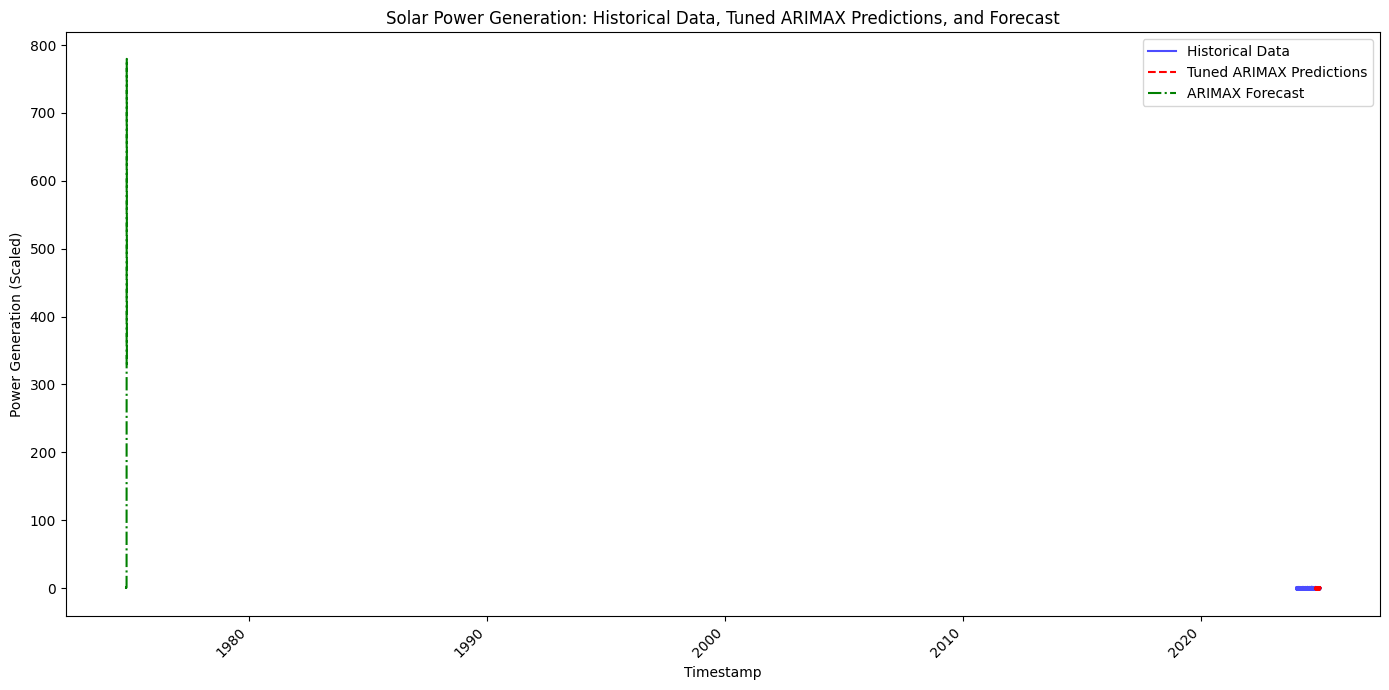

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the historical 'power_generation' data
ax.plot(df.index, df['power_generation'], label='Historical Data', color='blue', alpha=0.7)

# Plot the tuned ARIMAX model's predictions on the test set
ax.plot(y_test.index, arimax_pred, label='Tuned ARIMAX Predictions', color='red', linestyle='--')

# Plot the ARIMAX model's future forecasts
ax.plot(arimax_future_forecast.index, arimax_future_forecast, label='ARIMAX Forecast', color='green', linestyle='-.')

# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Power Generation (Scaled)')
ax.set_title('Solar Power Generation: Historical Data, Tuned ARIMAX Predictions, and Forecast')

# Include a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()